In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# image classification for hand written digits by CNN

# import libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mnist=tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# normalizing the data

In [4]:
X_train=X_train/255
X_test=X_test/255

In [5]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# visualize the data

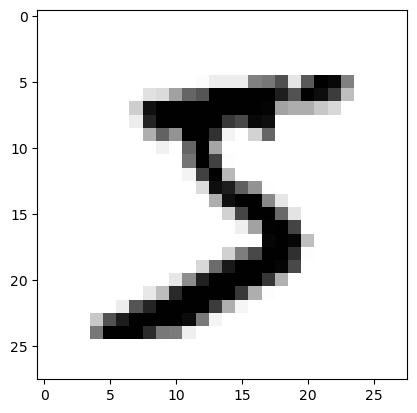

In [6]:
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()

# CNN model

In [7]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 12s 3ms/step - loss: 0.2270 - accuracy: 0.9327
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0956 - accuracy: 0.9707
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0660 - accuracy: 0.9797


# print accuracy

In [8]:
val_loss,val_acc=model.evaluate(X_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0820 - accuracy: 0.9751
0.08203902840614319 0.9750999808311462


# predicting random images

In [9]:
prediction=model.predict([X_test])

313/313 [==============================] - 1s 2ms/step


In [10]:
print(np.argmax(prediction[0]))

7


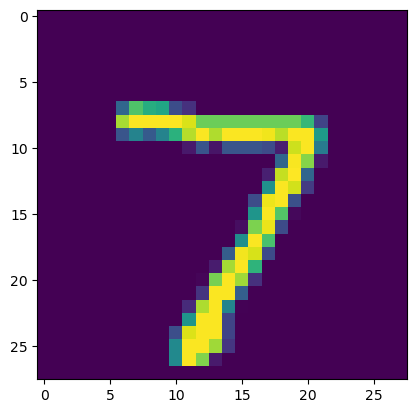

In [11]:
plt.imshow(X_test[0])
plt.show()

In [12]:
print(np.argmax(prediction[100]))

6


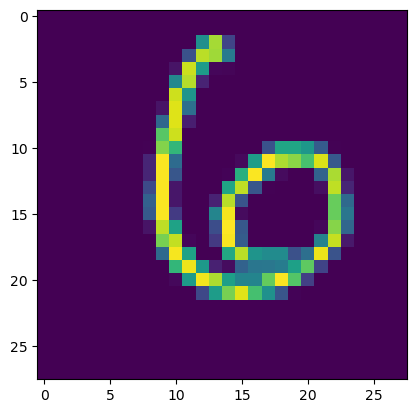

In [13]:
plt.imshow(X_test[100])
plt.show()

In [14]:
print(np.argmax(prediction[1702]))

8


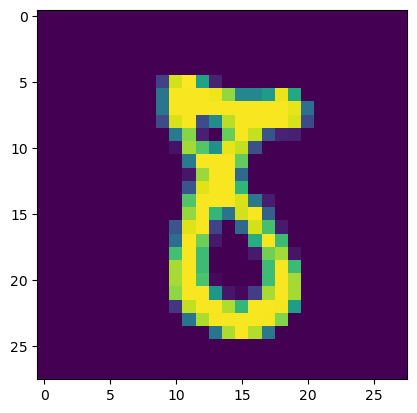

In [15]:
plt.imshow(X_test[1702])
plt.show()